In [20]:
# Visualisation of the RSSI tests
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [21]:
# Load saved data
# RSSI distribution over 10 meter of distance
# Data for the Fig. 4,5,7 and Tab. 1,2

x_dist = {}

for dist in np.arange(100, 1100, 100):
    x = open(str(dist) + "cm_2.txt", "r")
    x_dist[str(dist)] = x.readlines()
    x_dist[str(dist)] = [int(line.split(".")[1]) for line in x_dist[str(dist)]]
    x.close()

In [23]:
df 

,dist,rssi
0,1.0,-64
1,1.0,-64
2,1.0,-64
3,1.0,-64
4,1.0,-64
...,...,...
265,10.0,-95
266,10.0,-95
267,10.0,-94
268,10.0,-95


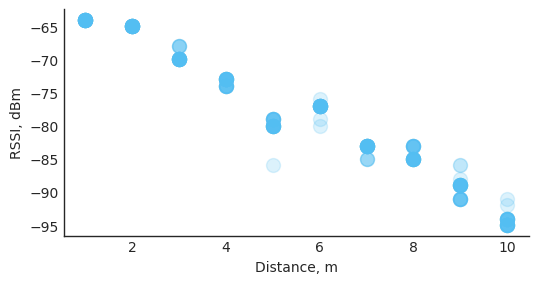

In [38]:
# Fig 4

plt.rcParams['figure.figsize'] = [5, 3]
fig, ax = plt.subplots(1, 1, figsize=(6, 3))
ax.scatter(df['dist'], df['rssi'], s = 100, c = '#53BEF2', alpha = 0.2)
ax.set_ylabel("RSSI, dBm")
ax.set_xlabel("Distance, m")
# plt.title(" RSSI fading over d = [1, 10]m ")
sns.despine()
fig.savefig('./plot1.png', bbox_inches='tight', dpi=600)

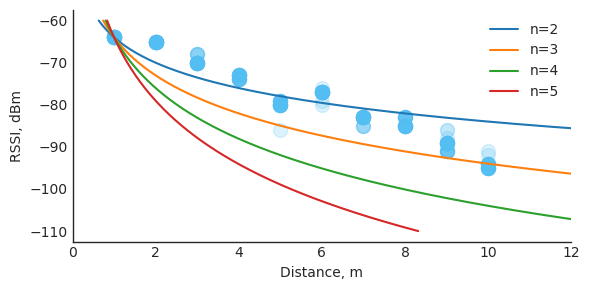

In [40]:
# Observations before for Figure 5
sns.set_style('white')
rssi0 = -64
x_calc = np.linspace(-110, -60, 1001)
fig, ax = plt.subplots(1, 1, figsize=(6, 3))
#plt.xlim(right = 11)

for n in np.arange(2, 6, 1):    
    y_calc = 10**((rssi0 - x_calc)/ (10 * n)) #distance
   
    ax.plot(y_calc, x_calc)   
ax.set_xlim(0,12)
ax.scatter(df['dist'], df['rssi'], s = 100, c = '#53BEF2', alpha = 0.2)
ax.set_ylabel("RSSI, dBm")
ax.set_xlabel("Distance, m")
# ax.set_title("n =" + str(n))
ax.legend(['n=2', 'n=3', 'n=4', 'n=5'])
sns.despine()
plt.tight_layout()
plt.savefig('./plot2_.png', bbox_inches='tight', dpi=600)

Mean error: 2.483572064309724
Relative error: 0.4955587655074364
Mean error: 3.0573161057346523
Relative error: 0.5701623064392123
Mean error: 3.6368272088293976
Relative error: 0.6313143023405636
Mean error: 3.8932984575285934
Relative error: 0.6571084661882333


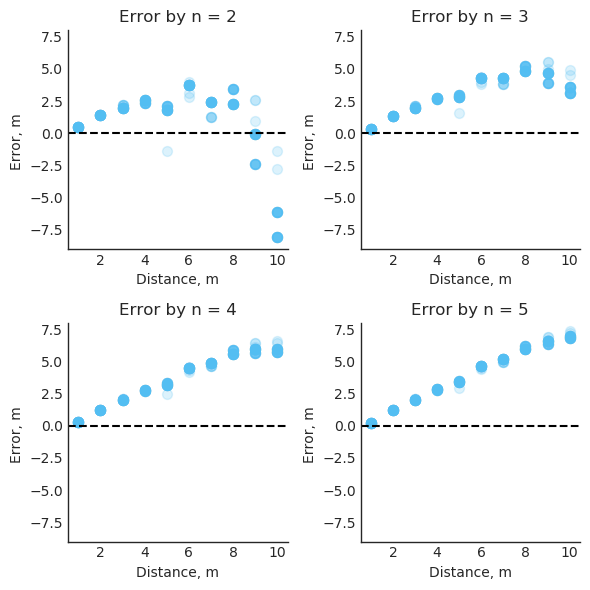

In [43]:
# For n = 2, 3, 4, 5
# Calculating the distance
# Estimating an error
# Plotting error
# Mean error calc
# Relative error
# Figure 7, Table 1

rssi0 = -69.86
fig, axs = plt.subplots(2, 2, sharex=False, sharey=False, figsize=(6, 6))
axs = axs.flatten()
#plt.rcParams['figure.dpi'] = 100
axs[0].set_ylim(-9, 4)
#axs[n-2].set_ylim(0,12)
sns.set_style('ticks')
for n in np.arange(2, 6, 1):      
    dist_calc = 10**((rssi0 - df['rssi'])/(10*n))
    error = df['dist'] - dist_calc
    axs[n-2].axhline(0, linestyle='--', color='black')
    axs[n-2].scatter(df['dist'], error, s = 50, c = '#53BEF2', alpha = 0.2)
    axs[n-2].set_ylim(-9, 8)
    axs[n-2].set_ylabel("Error, m ")
    axs[n-2].set_xlabel("Distance, m")
    #axs[n-2].set_xticks(np.arange(1, 11, 2))
    #axs[n-2].set_xticklabels([str(i) for i in (np.arange(0, 13, 2))])
    axs[n-2].set_title("Error by n = " + str(n))

    
    
    mean_error = np.mean(abs(error))
    print("Mean error: " + str(mean_error))
    
    rel_error = []
    for idx, i in enumerate(np.arange(1,11,1)):
        rel_error.append(np.mean(np.abs(error[27*(i-1):27*i])/i))      
        
    print("Relative error: " + str(np.mean(np.abs(rel_error))))
sns.despine()
fig.tight_layout()
fig.savefig('./plot3.png', bbox_inches='tight', dpi=500)


In [30]:
# Data for the Figure 6 
# Long observation of RSSI distribution at 1 m distance


x = open("100cm_long.txt", "r")
x_100_long = x.readlines()
x_100_long = [int(line.split(".")[1]) for line in x_100_long]
x.close()
   

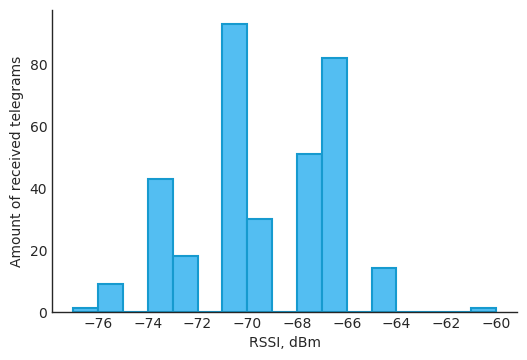

In [45]:
# Figure 6
plt.rcParams['figure.figsize'] = [5, 5]
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.hist(x_100_long, facecolor = '#53BEF2', edgecolor='#169acf', linewidth= 1.5, bins = 17)
ax.set_xticks([-76, -74, -72, -70, -68, -66, -64, -62, -60])
# plt.style.use('seaborn-whitegrid')
ax.set_ylabel('Amount of received telegrams')
ax.set_xlabel('RSSI, dBm')
sns.despine()
# plt.title("Distribution of RSSI at 1m over ~6h")
fig.savefig('./plot4.png', bbox_inches='tight', dpi=500)

In [32]:
# Mean rssi

rssi0 = np.mean(x_100_long)
print(rssi0)


-69.85964912280701


In [33]:
# Table 2
# Calculating expected rssi for spesfic distance
n = 3
rssi0 = -69.86

for dist in np.arange(1,31,1):
    rssi = rssi0 - 10 * n * np.log10(dist)
    print(rssi)
#also,0.1 m and 0.5 m
dist = 0.1
rssi = rssi0 - 10 * n * np.log10(dist)
print(rssi)
dist = 0.5
rssi = rssi0 - 10 * n * np.log10(dist)
print(rssi)
                                 



-69.86
-78.89089986991944
-84.17363764158988
-87.92179973983887
-90.82910013008056
-93.2045375115093
-95.21294120042771
-96.9526996097583
-98.48727528317974
-99.86
-101.10178055474674
-102.23543738142874
-103.2783005692051
-104.24384107034714
-105.14273777167044
-105.98359947967774
-106.77346764134822
-107.51817515309918
-108.22260802858486
-108.89089986991944
-109.52657884201759
-110.13268042466618
-110.71183508052778
-111.26633725134818
-111.79820026016114
-112.30920043912454
-112.80091292476962
-113.27474094026658
-113.73193993696867
-114.17363764158986
-39.86
-60.82910013008056


In [34]:
# Random calculations
n = 2
rssi0 = -69.86

dist = 1
rssi = -95

rssi_d = rssi0 - 10 * n * np.log10(dist)
print(rssi_d)
distance = 10**((rssi0 - rssi)/ (10 * n))
print(distance)



-69.86
18.071741260109274
